In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List
from linear_algebra import vector_mean
import math

In [81]:
dataset = [random.uniform(0,100) for _ in range(1000)]
dataset_ans = [2*x + random.gauss(-50,50) for x in dataset]
theta = [random.uniform(-1,1) for _ in range(2)]

def linear_gradient(x:float, y:float, theta:List)->List:
    slope, intercept = theta
    error = ((slope*x + intercept)-y)
    return [ 2*error*x, 2*error]

def gradient_step(learning_rate:float, v:List, gradient:List)->List:
    step_taken = [learning_rate*grad for grad in gradient]
    return [z+w for (z,w) in zip(v, step_taken)]

def random_batch_gen(batch_size:int, x:List, y:List):
    indices = random.sample(range(len(x)), batch_size)

    return [(x[j], y[j]) for j in indices]

def find_theta(x:List, y:List)->List:
    tolerance = 1e-3
    theta = [random.uniform(-1,1) for _ in range(2)]
    for epochs in range(1000):
        batch = random_batch_gen(100, x, y)
        gradient = vector_mean([linear_gradient(x,y, theta) for (x,y) in batch])
        grad_magnitude = sum(g**2 for g in gradient) ** 0.5
        if grad_magnitude <tolerance:
            print("stopped early")
            break
        theta = gradient_step(-0.0001, theta, gradient)
    return theta

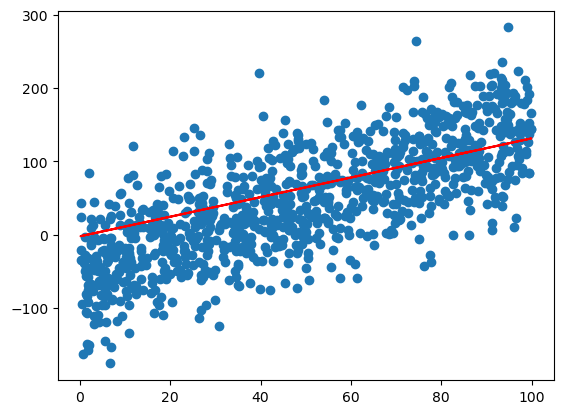

In [82]:
plt.scatter(dataset, dataset_ans)
slope,intercept = find_theta(dataset, dataset_ans)
result = [slope*x + intercept for x in dataset]
plt.plot(dataset, result, color='red')

In [83]:
def start_cv(index: int, x: List, y: List) -> (float, float):
    removed_x = x[index]
    removed_y = y[index]

    new_x = x[:index] + x[index+1:]
    new_y = y[:index] + y[index+1:]

    theta = find_theta(new_x, new_y)
    slope, intercept = theta

    predicted = slope * removed_x + intercept
    error = (predicted - removed_y) ** 2
    total_variance = (removed_y - np.mean(new_y)) ** 2
    return error, total_variance


In [ ]:
# Here we will be getting the score
total_error = 0.0
total_variance = 0.0

for i in range(len(dataset)):
    err, var = start_cv(i, dataset, dataset_ans)
    total_error += err
    total_variance += var

r_squared = 1 - (total_error / total_variance)
print("Cross-validated R² score:", r_squared)